# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidence to answer the following questions.

1. How many neighborhood groups are there and which shows up the most?
2. Are private rooms the most popular in Manhattan?
3. Who are the top 10 busiest hosts based on number of reviews per month?
4. Which neighorhood group has the highest average price? Plot the average prices in a professional looking bar chart
5. What is the most expensive neighbourhood in each neighbourhood group?
6. Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
7. Who currently has no (zero) availability with a review count of 100 or more?
8. If each host rents all of their properties for the night, which 5 make the most that night?
9. When did Danielle from Queens last receive a review?
10. Display a bar chart showing the number of each type of room in the Bronx



Happy Coding!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
air_bnb = pd.read_csv('./AB_NYC_2019.csv')
air_bnb.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [23]:
# How many neighbourhood groups / which shows up the most
counting_group = air_bnb

counting_group['neighbourhood_group'].value_counts()

# There are 5 groups with Manhattan having the most people

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [39]:
# Are private rooms the most popular in Manhattan?
popular_rooms = air_bnb

popular_rooms['room_type'].value_counts()

# Private rooms are not the most popular

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [68]:
# Who are the top 10 busiest hosts based on number of reviews per month?
host_count = air_bnb

host_count.groupby(['host_id','host_name']).sum().nlargest(10, 'reviews_per_month')

# sonder, row, lakshmee, danielle, david, gabriel, asad, len, nalicia, maya

,,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,host_name,,,,,,,,,
219517861,Sonder (NYC),10885561678,13316.25823,-24198.18856,82795,4353,1281,397.56,106929,98588
244361589,Row NYC,294108503,366.82627,-665.89623,1845,9,305,111.72,81,2633
232251881,Lakshmee,254974885,325.33942,-590.27250,403,8,482,80.63,64,1369
26432133,Danielle,74542317,203.81845,-369.35591,236,5,2017,68.02,25,1443
137274917,David,345517389,489.12293,-887.88925,1320,12,607,62.89,144,2827
224414117,Gabriel,921229890,1222.67553,-2219.92301,6394,30,403,59.10,900,8679
156948703,Asad,135792224,244.61926,-443.23651,588,6,1052,56.44,36,2038
344035,Brooklyn& Breakfast -Len-,155403744,528.82140,-961.61568,970,13,2205,56.00,169,3723
156684502,Nalicia,66477294,121.98566,-221.30880,180,3,1046,54.38,9,77


In [78]:
# Which neighborhood group has the highest avg price and plot the average prices in a bar chart
average_price = air_bnb.groupby('neighbourhood_group').mean()['price'].nlargest()
average_price

# Manhattan

neighbourhood_group  neighbourhood 
Staten Island        Fort Wadsworth    800.000000
                     Woodrow           700.000000
Manhattan            Tribeca           490.638418
Brooklyn             Sea Gate          487.857143
Bronx                Riverdale         442.090909
Name: price, dtype: float64

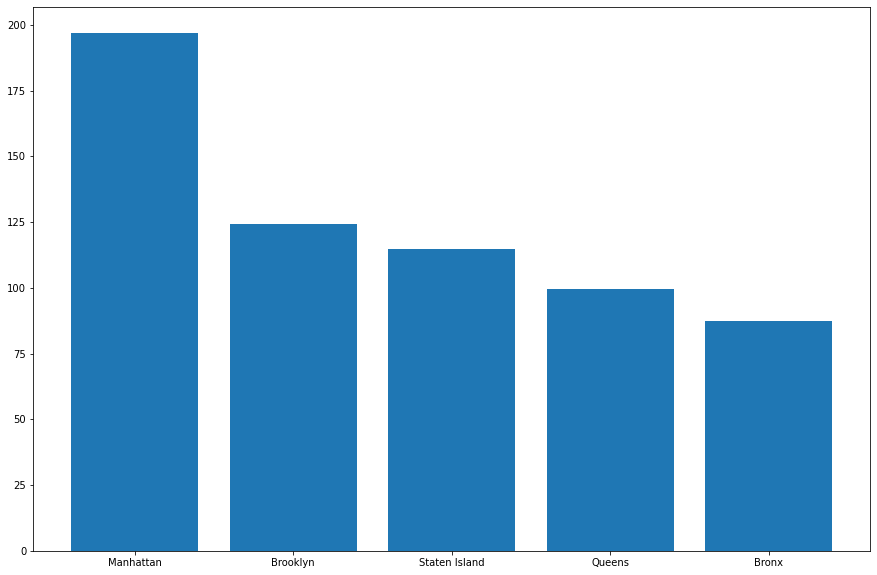

In [75]:
fig, ax = plt.subplots(figsize=(15,10))

plt.bar(average_price.index.to_list(), average_price)

plt.show()

In [90]:
# What is the most expensive neighbourhood in each neighbourhood_group
for neighbourhood_group in average_price.index:
    print(neighbourhood_group)
    print(air_bnb[air_bnb['neighbourhood_group'] == neighbourhood_group].groupby('neighbourhood').mean()['price'].nlargest(1))
    
#fort wadsworth,woodrow,tribeca,sea gate,riverdale

('Staten Island', 'Fort Wadsworth')
Series([], Name: price, dtype: float64)
('Staten Island', 'Woodrow')
Series([], Name: price, dtype: float64)
('Manhattan', 'Tribeca')
Series([], Name: price, dtype: float64)
('Brooklyn', 'Sea Gate')
Series([], Name: price, dtype: float64)
('Bronx', 'Riverdale')
Series([], Name: price, dtype: float64)


In [98]:
# Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
air_bnb['minimum_rental'] = air_bnb['price'] +  air_bnb['minimum_nights']
air_bnb.nlargest(5,'minimum_rental')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,minimum_rental
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0,10100
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83,10098
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83,10030
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365,10029
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0,10005


In [101]:
# Who has no (zero) availability with a review count of 100 or more

air_bnb[(air_bnb['availability_365'] == 0) & (air_bnb['number_of_reviews'] >= 100)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,minimum_rental
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,81
94,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0,105
132,30031,NYC artists’ loft with roof deck,129352,Sol,Brooklyn,Greenpoint,40.73494,-73.95030,Private room,50,3,193,2019-05-20,1.86,1,0,53
174,44221,Financial District Luxury Loft,193722,Coral,Manhattan,Financial District,40.70666,-74.01374,Entire home/apt,196,3,114,2019-06-20,1.06,1,0,199
180,45556,"Fort Greene, Brooklyn: Center Bedroom",67778,Doug,Brooklyn,Fort Greene,40.68863,-73.97691,Private room,65,2,206,2019-06-30,1.92,2,0,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29581,22705516,The Quietest Block in Manhattan :),127740507,Kathleen,Manhattan,Harlem,40.83102,-73.94181,Private room,65,2,103,2019-07-07,5.89,2,0,67
30461,23574142,queens get away!!,176185168,Janet,Queens,Laurelton,40.68209,-73.73662,Private room,65,1,119,2018-12-24,7.79,1,0,66
31250,24267706,entire sunshine of the spotless mind room,21074914,Albert,Brooklyn,Bedford-Stuyvesant,40.68234,-73.91318,Private room,49,1,102,2019-07-05,6.73,3,0,50
32670,25719044,COZY Room for Female Guests,40119874,Stephany,Brooklyn,Prospect-Lefferts Gardens,40.66242,-73.94417,Private room,48,1,131,2019-05-31,9.97,2,0,49


In [102]:
# If each host rents all of their properties for the night, which 5 make the most that night?
air_bnb.groupby(['host_id', 'host_name']).sum().nlargest(5, 'price')

,,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,minimum_rental
host_id,host_name,,,,,,,,,,
219517861,Sonder (NYC),10885561678,13316.25823,-24198.18856,82795,4353,1281,397.56,106929,98588,87148
107434423,Blueground,7210036953,9451.60418,-17166.13165,70331,7470,29,6.04,53824,58884,77801
156158778,Sally,332529233,488.73929,-887.71735,37097,12,1,1.00,144,776,37109
205031545,Red Awning,1415225676,1996.92821,-3624.34656,35294,750,127,21.21,2401,10796,36044
30283594,Kara,1611854192,4931.41347,-8952.50779,33581,3767,65,3.94,14641,37924,37348


In [104]:
# When did Danielle from Queens last receive a review?
air_bnb[(air_bnb['host_name'] == 'Danielle') & (air_bnb['neighbourhood_group'] == 'Queens')].sort_values('last_review', ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,minimum_rental
22469,18173787,Cute Tiny Room Family Home by LGA NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,1,436,2019-07-08,16.03,5,337,49
21517,17222454,Sun Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76367,-73.87088,Private room,48,1,417,2019-07-07,14.36,5,338,49
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341,49
22068,17754072,Bed in Family Home Near LGA Airport,26432133,Danielle,Queens,East Elmhurst,40.76389,-73.87155,Shared room,38,1,224,2019-07-06,7.96,5,80,39
7086,5115372,Comfy Room Family Home LGA Airport NO CLEANING...,26432133,Danielle,Queens,East Elmhurst,40.76374,-73.87103,Private room,54,1,430,2019-07-03,13.45,5,347,55
33861,26814763,One bedroom with full bed / 1 stop from Manhattan,201647469,Danielle,Queens,Long Island City,40.74565,-73.94699,Private room,108,2,13,2019-06-20,1.74,1,333,110
27021,21386105,Quiet & clean 1br haven with balcony near the ...,154256662,Danielle,Queens,Astoria,40.77134,-73.92424,Entire home/apt,250,3,1,2018-01-02,0.05,1,180,253
16349,13151075,ASTORIA APARTMENT OUTDOOR SPACE,18051286,Danielle,Queens,Astoria,40.77221,-73.92901,Private room,50,1,0,NaN,NaN,1,0,51


In [105]:
# bar chart showing the number of room types in the Bronx
bronx_rooms = air_bnb[air_bnb['neighbourhood_group'] == 'Bronx']
bronx_room_count = bronx_rooms.groupby('room_type').count()['id']
bronx_room_count

room_type
Entire home/apt    379
Private room       652
Shared room         60
Name: id, dtype: int64

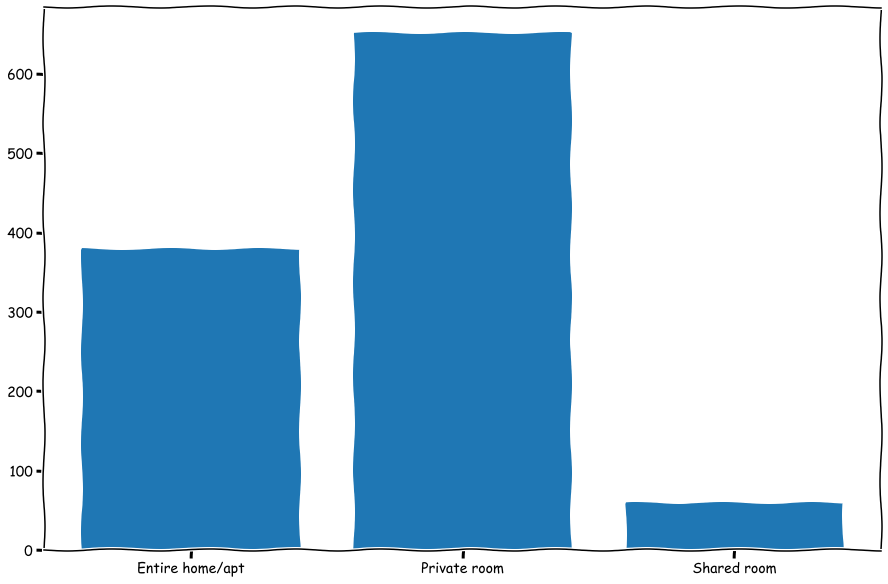

In [106]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(15,10))
    plt.bar(bronx_room_count.index, bronx_room_count)
    plt.show()

# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --

In [ ]:
# Overall,
#     All the questions were easy and concise to follow along with. All the questions combined the use of all 3 libraries well 
#     and helped consolidate the knowledged gained from all those exercies. Also AirBnB seems to be a lucrative business to i 
#     might be looking into that so thanks for the help!
# Sincerely,
#     Kelvin